# Airbnb 가격을 추정하는 회귀 모형 분석

## 1. Airbnb 란?

![alt text](https://a0.muscache.com/airbnb/static/logos/belo-1200x630-a0d52af6aba9463c82017da13912f19f.png 'airbnb image')

에어비앤비(Airbnb)는 2008년 8월 시작된 세계 최대의 숙박 공유 서비스이다. 자신의 방이나 집, 별장 등 사람이 지낼 수 있는 모든 공간을 임대할 수 있다. 2013년 기준 192개국 3만 2천여개 숙소 중개를 하던 서비스가 2016년 192개국 300만여개 숙소에 대한 숙박을 중개하고 있으며, 초당 수십 건 씩 예약이 이뤄지고있는 공유경제 서비스의 대명사로 자리잡았다. 2013년 1월 29일 한국 진출을 발표했다.

###  - 스타트업에서 공유경제 공룡으로
2007년 10월, 샌프란시스코로 이주한 브라이언 체스키와 조 게비아는 IDSA(Industrial Designers Society of America)가 주최한 인더스트리얼 디자인 콘퍼런스 기간 동안 비싼 호텔 숙박비용으로 인하여 숙박에 어려움을 겪던 컨퍼런스 참여자를 위해 본인들이 거주하던 4평 남짓한 스튜디오에 에어베드를 두고 아침식사를 제공하면서 베드앤브렉퍼스트에 대한 초기 개념을 만들었다.

2009년 3월, Airbedandbreakfast.com라는 이름은 Airbnb.com으로 변경되었고 사이트의 내용은 에어 베드와 공유 공간에서 집 전체와 아파트, 개인 방, 성, 보트, 이글루 등 다양한 특성으로까지 확대되었다. 2017년에는 독특한 숙소에 대한 숙박 뿐 아니라 다양한 배경지식을 가진 호스트들이 진행하는 트립호스팅을 런칭하면서 여행사업까지 사업영역을 확장하였다.

## 2. 분석 동기 및 이유

스타트업에서 시작한 공유경제 서비스이기도 하고 팀원들이 모두 공유경제 서비스에 대한 관심이 높았다. 특히 현재 에어비앤비에서 호스팅을 하고 있는 팀원이 있어 에어비앤비에 대한 배경지식을 얻기 수월하였으며 분석을 통해 서비스를 이용하고 호스팅에 대한 관심을 높일 수 있어 분석을 진행하였다.

분석을 위한 데이터 서칭 중 에어비앤비가 진출한 대표 도시별 숙소데이터를 수집하고 있는 블로거를 찾을 수 있었다.

http://tomslee.net/airbnb-data-collection-get-the-data

톰스 리 라는 이름의 블로거는 2013년도부터 에어비앤비내에서 서비스 하고 있는 각 도시 별 에어비앤비 숙소에 대한 데이터를 주기적으로 크롤링하여 제공하고있었다.

In [1]:
from IPython.display import IFrame
IFrame('http://tomslee.net/airbnb-data-collection-get-the-data', 800, 350)

# 오호라! 데이터도 있구나!!! Gotcha!!!

주제에 대한 협의는 없었지만 분석용 데이터를 확보한 팀원들은 열정적으로 데이터 가공을 하기 시작했다. 총 113개 도시의 17만개 숙소에 대한 데이터를 찾을 수 있었고. 이 데이터에 존재하는 host_id 및 uesr_id를 통해 추가적으로 획득 가능한 데이터의 단서를 찾을 수 있었다.

지금부터 에어비앤비를 주제로 한 회귀분석 데이터 수집 및 회귀분석 과정을 설명하기로 한다.

## 3. Airbnb 데이터 수집

### 1) 톰스 리의 블로그에 올라온 자료 
#### - seoul의 경우

In [4]:
import pandas as pd
df = pd.read_csv("Downloads/seoul/seoul2016-05-29.csv")
df.tail()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
8514,13026019,22397416,Private room,NaN,Sangdo 1(il)-dong,0,NaN,1,1.0,10.0,6.0,37.502943,126.949581,2016-05-29 06:16:19.230565
8515,7394676,30677554,Private room,NaN,Seogyo-dong,25,4.5,2,1.0,35.0,2.0,37.554388,126.926891,2016-05-29 06:57:55.517402
8516,12591541,20043173,Private room,NaN,Seogyo-dong,1,NaN,1,1.0,26.0,6.0,37.555832,126.924590,2016-05-29 08:58:22.989791
8517,12412788,19997816,Private room,NaN,Bomun-dong 7(chil)-ga,0,NaN,2,1.0,18.0,1.0,37.580177,127.020668,2016-05-29 04:54:11.421612
8518,8329370,23311813,Private room,NaN,Jeongneung-dong,3,5.0,1,1.0,18.0,7.0,37.614649,127.009015,2016-05-29 09:36:17.943598


#### - 항목 설명

항목 | 설명 |항목 | 설명 |항목 | 설명 |
:---------|:----------|:---------|:----------|:---------|:----------|
room_id | 방 id |city | 도시 |survey_id | 설문조사 id |
borough | 지역 | host_id | 호스트 id | neighborhood | 인근지역 |
room_type | 방 종류 | reviews | 리뷰 수 |country | 국가 |
overall_satisfaction | 평균 만족 별점 $\qquad$|accommodates | 숙박가능인원 수 $\qquad$| last_modified | 자료수집 날짜 |
bedrooms | 침실 수 | latitude | 위도 |bathrooms | 욕실 수 | 
longitude | 경도 |price | 일박당 숙박가격 | location | 장소 id |
minstay | 최소 숙박일 |  __총 항목수__| __19개__

#### - 사용 가능한 데이터

Data 분류 | 항목 |
:---------|:----------|
index | room_id 
카테고리 | city, room_type
실수/정수 |reviews, overall_satisfaction, accommodates, bedrooms, bathrooms, price
__총 항목수__| __9개__ 

**크롤링**을 통해 추가 데이터를 수집하기로 결정.

### 2) 크롤링으로 가져온 데이터
#### 각각의 도시(Singapore, Seoul, Swiss)에서 room_id를 기준으로 추가적으로 데이터를 크롤링했습니다.

https://www.airbnb.co.kr/rooms/room_id

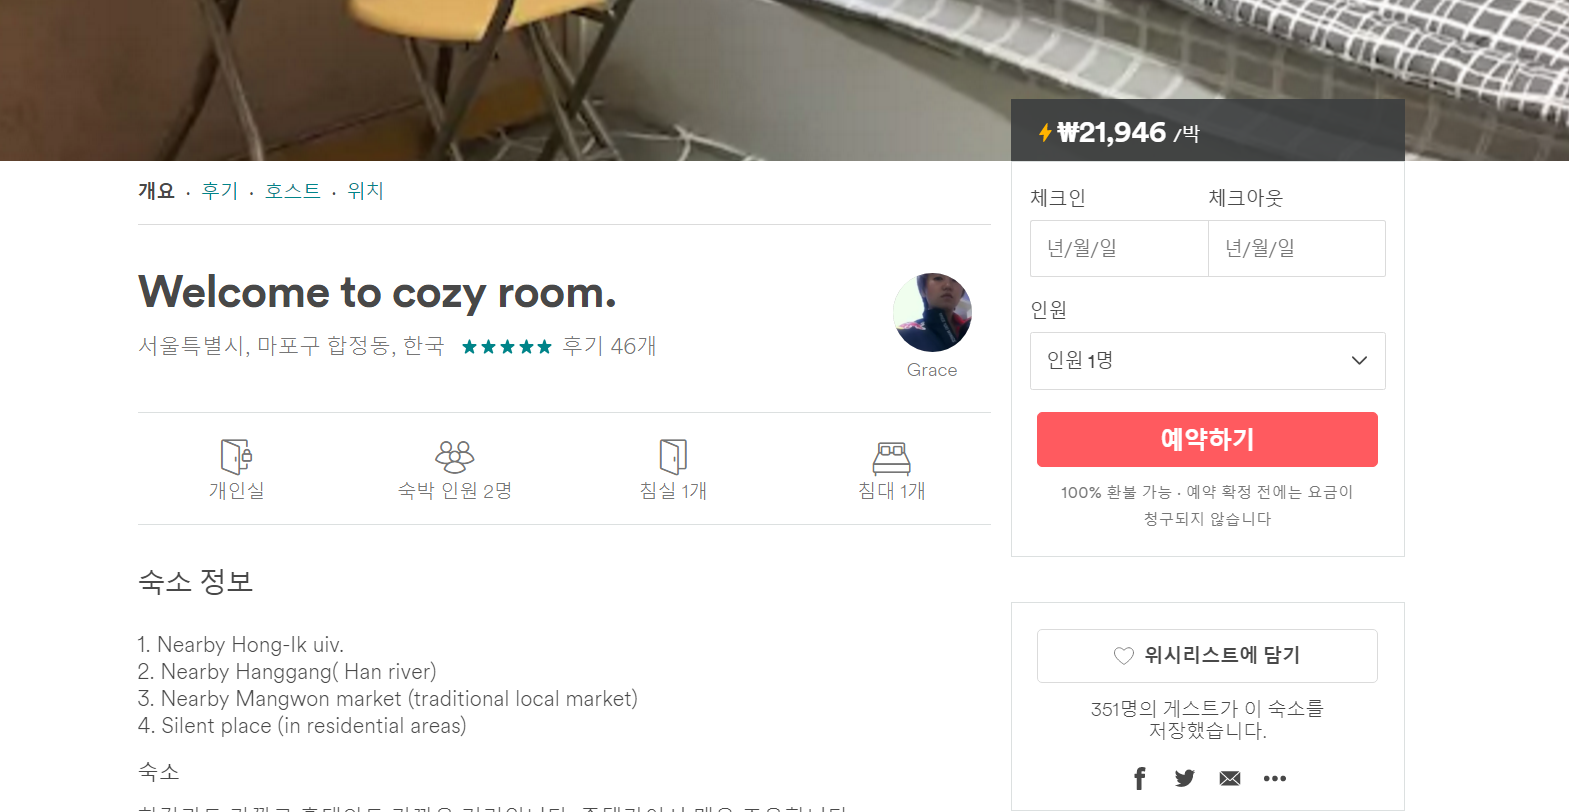

In [6]:
from PIL import Image
im = Image.open("Downloads/datapresentation/airbnb_1.png")
im_1 = Image.open("Downloads/datapresentation/airbnb_2.png")
im

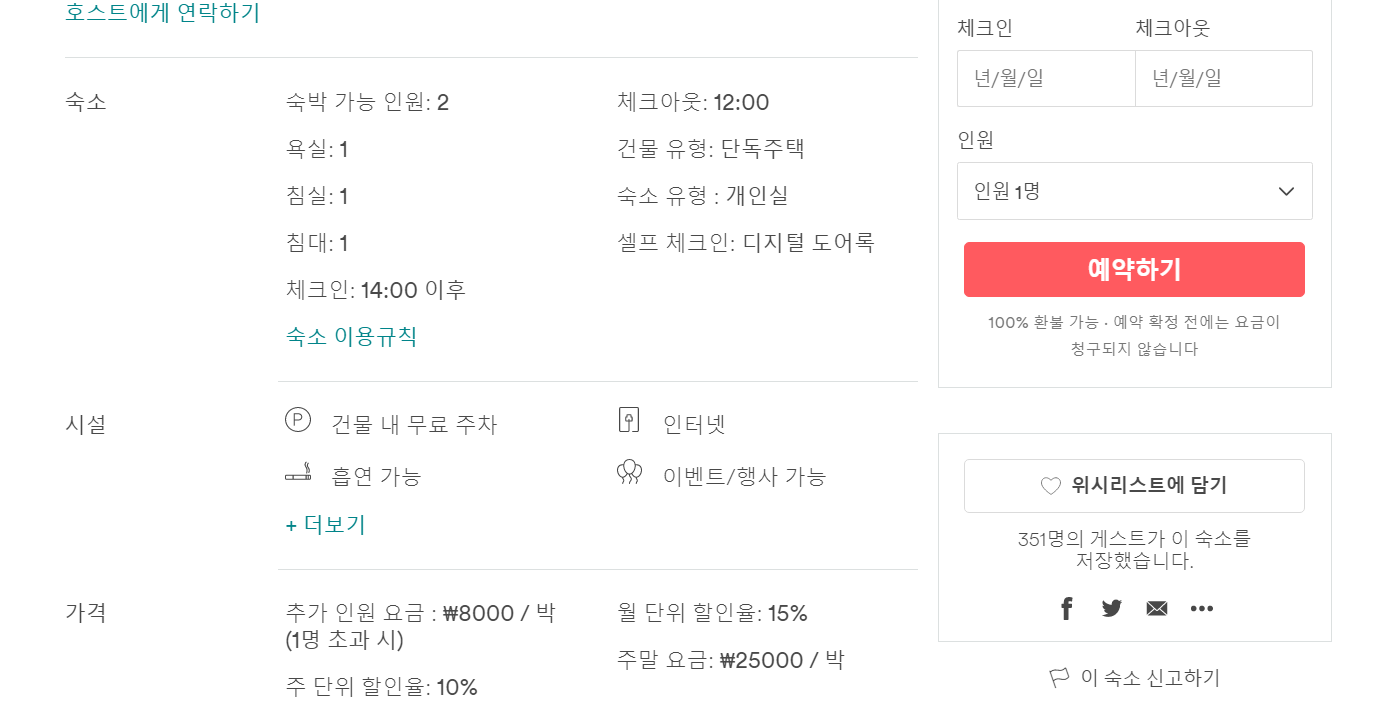

In [7]:
im_1

In [9]:
df_1 = pd.read_csv("Downloads/datapresentation/seoul5000.csv")
df_1.tail()

,room_id,Accommodates,Average stars,Bathrooms,Bed type,Bedrooms,Beds,Check In,Check Out,Cleaning Fee,...,Total reviews,Weekend Price,others,review 1,review 2,review 3,review 4,review 5,review 6,superhost
4995,9980077,8,4.5,2,NaN,4,6,Anytime after 3PM,11AM,₩23005,...,91.0,NaN,"[Internet, Family/kid friendly, Kitchen, Wirel...",4.5,4.5,4.5,4.5,4.5,4.5,0
4996,9980353,14,NaN,2,NaN,3,14,NaN,NaN,₩30000,...,NaN,₩250000 / night,"[Free parking on premises, Internet, Family/ki...",NaN,NaN,NaN,NaN,NaN,NaN,0
4997,9980772,6,4.5,1,Real Bed,1,1,Anytime after 3PM,11AM,₩36808,...,47.0,NaN,"[Free parking on premises, Internet, Family/ki...",4.5,5.0,4.5,4.5,5.0,4.5,0
4998,9983409,6,5.0,1,NaN,3,3,Anytime after 3PM,11AM,₩57513,...,46.0,NaN,"[Free parking on premises, Internet, Kitchen, ...",5.0,5.0,5.0,5.0,5.0,5.0,1
4999,9987361,1,4.5,8+,NaN,1,4,1PM - 12AM (midnight),12PM (noon),NaN,...,14.0,NaN,"[Internet, Hot tub, Doorman, Kitchen, Smoke de...",5.0,5.0,5.0,4.5,5.0,5.0,0


#### 크롤링한 데이터 항목

항목 | 설명 $\qquad$|항목 | 설명 $\qquad$|항목 | 설명 $\qquad$|
:---------|:----------|:---------|:----------|:---------|:----------|
Average stars | 평균 평점 | Bed type | 침대 종류 | Beds | 침대 수 |
Check In | 체크인 시간 | Check Out | 체크아웃 시간 | Cleaning Fee | 청소비 |
Extra people | 추가인원에 대한 요금 | Pet Owner | 애완동물 숙박가능여부 |Property type | 숙박건물 종류 |
Security Deposit | 보증금 | Self check-in | 셀프체크인 여부 | Weekend price | 주말 특별 요금 |
review 1 | 정확성 리뷰 | review 2 | 의사소통 리뷰 | review 3 | 청결도 리뷰 |
review 4 | 위치 리뷰 | review 5 | 체크인 리뷰 | review 6 | 가치 리뷰 |
superhost | 슈퍼호스트 여부 | others | 기타 시설 정보 | **총 항목 수** | **20개**

## 4. Airbnb 데이터 전처리
### 크롤링한 데이터의 경우에는 데이터 전처리가 필요
#### - others 데이터 처리

문자열 데이터형인 others 항목을 list로 바꾼 다음 빈도수 조사

In [ ]:
corpus = {}
for j in ((dfs_del.others)):
    for i in j.split('[')[1].split(']')[0].split(','):
        if ("minimum" in i) or ("2016" in i) or ("2017" in i) or ("2015" in i) or ("2018" in i):
            continue
        if i not in corpus:
            corpus[i] = 1
        else:
            corpus[i] += 1
import operator
sorted_corpus = sorted(corpus.items(), key=operator.itemgetter(1))

상위 4개 항목인 **internet, smoke detector, family/kid friendly, kitchen**에 대해 One-hot-encoding 처리하여 데이터에 추가

In [60]:
# 함수 정의
def internet(x):
    if "internet" in x:
        return 1
    else:
        return 0
    
def Smoke_detector(x):
    if "smoke detector" in x:
        return 1
    else:
        return 0
    
def Family_kid_friendly(x):
    if "family/kid friendly" in x:
        return 1
    else:
        return 0

def Kitchen(x):
    if "kitchen" in x:
        return 1
    else:
        return 0
    
# internet(x)라는 함수는 각 행의 ohters에서 internet이라는 단어가 들어 있으면 return을 1로 하고, 없으면 0을 하는 함수

In [72]:
df_c["Internet"] = df_c["others"].map(str.lower).map(internet)
df_c["Somke_detector"] = df_c["others"].map(str.lower).map(Smoke_detector)
df_c["Family_kid_friendly"] = df_c["others"].map(str.lower).map(Family_kid_friendly)
df_c["Kitchen"] = df_c["others"].map(str.lower).map(Kitchen)

# map이라는 함수를 통해서 일단 소문자로 바꿔주고, 새로운 열을 만들어주는데 단어 카운트한 결과를 넣어준다.

#### 분석에 사용한 데이터 설명

| 변수 이름 | 데이터타입 | 변수설명 | 데이터수집방법 및 출처 |
|:---|:---|:---|:---|
| price (y) | int | 1박당 가격 | http://tomslee.net/airbnb-data-collection-get-the-data |
| overall_satisfaction (x)| int | room_id에 매칭 된 숙소의 평점 평균 | http://tomslee.net/airbnb-data-collection-get-the-data |
| accommodates (x)| int | 최대 수용 인원 | http://tomslee.net/airbnb-data-collection-get-the-data |
| bedrooms (x) | int | 숙소 당 침실 수 | http://tomslee.net/airbnb-data-collection-get-the-data |
| reviews (x) | int | 숙소의 평점 갯수 | http://tomslee.net/airbnb-data-collection-get-the-data |
| Entire_home_apt (x) | cat | room_type (집 전체 사용) | http://tomslee.net/airbnb-data-collection-get-the-data |
| Private_room (x) | cat | room_type (개인실) | http://tomslee.net/airbnb-data-collection-get-the-data |
| Shared_room (x) | cat | room_type (도미토리) | http://tomslee.net/airbnb-data-collection-get-the-data |
| Seoul (x) | cat | city (숙소가 위치한 도시) | http://tomslee.net/airbnb-data-collection-get-the-data |
| Switzerland (x) | cat | city (숙소가 위치한 도시) | http://tomslee.net/airbnb-data-collection-get-the-data |
| Singarpore (x) | cat | city (숙소가 위치한 도시)  | http://tomslee.net/airbnb-data-collection-get-the-data |
| Bathrooms (x) | int | 욕실 갯수 | room_id 기준 airbnb 홈페이지 크롤링 |
| Beds (x) | int | 침대 갯수 | room_id 기준 airbnb 홈페이지 크롤링 |
| Extra_people (x) | cat | 초과인원에 대해 과금 여부 | room_id 기준 airbnb 홈페이지 크롤링 |
| Superhost (x) | cat | 슈퍼호스트 여부 | room_id 기준 airbnb 홈페이지 크롤링 |
| Internet (x) | cat | 인터넷 유무 | room_id 기준 airbnb 홈페이지 크롤링 |
| smoke_detector (x) | cat | 화재감지기 유무 | room_id 기준 airbnb 홈페이지 크롤링 |
| Family_kid_friendly (x) | cat | 가족, 유아 숙박 가능여부 | room_id 기준 airbnb 홈페이지 크롤링 |
| Kitchen (x) | cat | 인터넷 유무 | room_id 기준 airbnb 홈페이지 크롤링 |

## 5. airbnb 데이터 분석

In [94]:
 %matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics import utils
import scipy as sp
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

air_bnb = pd.read_csv('Downloads/airbnb_dataset_final.csv')

In [86]:
np.random.seed(0)
air_bnb = air_bnb.sample(frac=1).reset_index(drop=True)

In [104]:
scale_list = ["accommodates", "bedrooms", "overall_satisfaction", "reviews", 'Bathrooms', 'Beds']

air_bnb_scale = pd.DataFrame(StandardScaler().fit_transform(air_bnb[scale_list]),columns = scale_list)

category = [u'Seoul', u'Singapore', u'Switzerland',  u'Entire_home_apt',u'Private_room'
            , u'Shared_room', 'Extra_people', 'superhost', 'Internet', u'Somke_detector', u'Family_kid_friendly', u'Kitchen']
for i in category:
    air_bnb_scale[i] = air_bnb[i]
air_bnb_scale['price'] = np.log(air_bnb['price'])

### Scale된 모형의 잔차 분포(정규성, 등분산성)

#### - Price의 Log 변환 전 Price에 따른 잔차의 분포

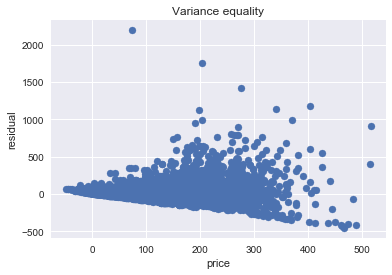

In [105]:
m = sm.OLS.from_formula('price ~ accommodates+bedrooms+overall_satisfaction+reviews+Bathrooms+Beds+Seoul+Singapore+Switzerland+Entire_home_apt+Private_room+Shared_room+Extra_people+superhost+Internet+Somke_detector+Family_kid_friendly+Kitchen', air_bnb)
a = m.fit().predict(air_bnb)
b = m.fit().resid
plt.title('Variance equality')
plt.xlabel('price')
plt.ylabel('residual')
plt.scatter(a,b)
plt.show()

#### - Price log 변환 후 Price 변화에 따른 잔차의 분포

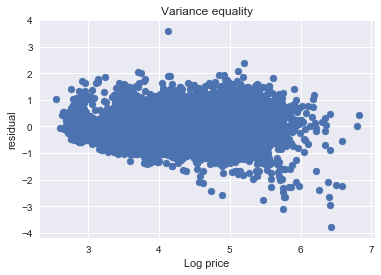

In [106]:
model = sm.OLS.from_formula('price ~ accommodates+bedrooms+overall_satisfaction+reviews+Bathrooms+Beds+Seoul+Singapore+Switzerland+Entire_home_apt+Private_room+Shared_room+Extra_people+superhost+Internet+Somke_detector+Family_kid_friendly+Kitchen', air_bnb_scale)
result = model.fit()
a = result.predict(air_bnb_scale)
b = result.resid
plt.title('Variance equality')
plt.xlabel('Log price')
plt.ylabel('residual')
plt.scatter(a,b)
plt.show()

`Reference` http://wolfpack.hnu.ac.kr/lecture/Regression/ch3_residual.pdf

In [90]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1879.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:09:31   Log-Likelihood:                -11297.
No. Observations:               19075   AIC:                         2.263e+04
Df Residuals:                   19058   BIC:                         2.276e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4185 

- Y인 'price'를 log 변환했다.
- 왜도는 0.036 첨도는 5.626이다.
- Durbin-Watson 2에 근접하여 잔차들이 독립적이라고 할 수 있다.
- 모든 변수들이 y를 설명하는데 유의한 것으로 나왔다.
- 앞으로의 진행은 최적의 모형을 찾는 것을 목표로 삼겠다.

### Scale된 모형의 잔차 분포

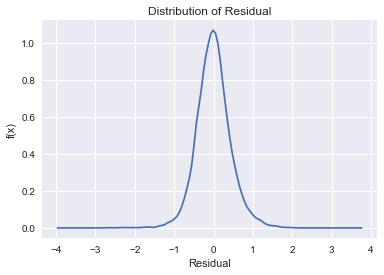

In [107]:
residual = result.resid
sns.kdeplot(residual)
plt.xlabel('Residual')
plt.ylabel('f(x)')
plt.title('Distribution of Residual')
plt.show()

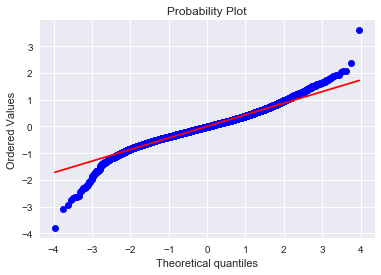

In [108]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [109]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 1186.059
P-value     :  0.000


- 잔차의 분포를 살펴본 결과, 정규성 가정은 성립하지 않는 것으로 나타났다.

### 아웃라이어 제거

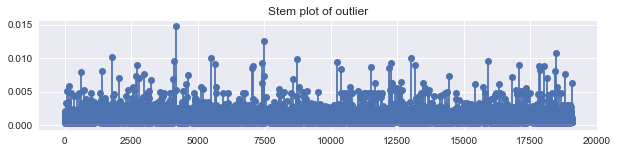

In [110]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.figure(figsize=(10, 2));
plt.title('Stem plot of outlier')
plt.stem(hat);
plt.show()

In [112]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / float((len(air_bnb_scale['price']) - 20))
idx = np.where(cooks_d2 > fox_cr)[0]
air_bnb_out = air_bnb_scale.iloc[air_bnb_scale.index[idx]]
air_bnb_scale.drop(air_bnb_scale.index[idx], axis = 0, inplace = True)
air_bnb_scale.reset_index(drop = True, inplace = True)

#### - Fox' Outlier Recommendation 기준으로 측정되는 Outlier 항목들을 제거한다..
$$D_i > \frac{4}{N-K-1}$$

### Outlier 제거후 stemplot

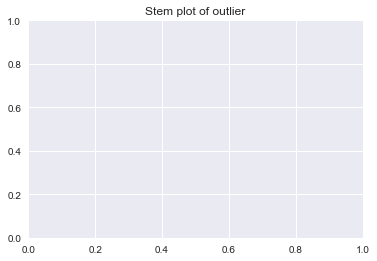

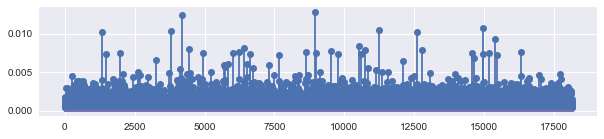

In [30]:
model2 = sm.OLS.from_formula('price ~ accommodates + bedrooms + overall_satisfaction + reviews + Bathrooms + Beds + Seoul + Singapore + Switzerland + Entire_home_apt + Private_room + Shared_room + Extra_people + superhost + Internet + Somke_detector + Family_kid_friendly + Kitchen',air_bnb_scale)
result2 = model2.fit()
influence = result2.get_influence()
hat = influence.hat_matrix_diag
plt.figure(figsize=(10, 2));
plt.title('Stem plot of outlier');
plt.stem(hat);
plt.show()

**제거된 아웃라이어 수**

In [60]:
len(idx)

927

### Outlier 제거 후 축소 회귀모형의 결과값

In [61]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2585.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:03:20   Log-Likelihood:                -7321.7
No. Observations:               18148   AIC:                         1.468e+04
Df Residuals:                   18131   BIC:                         1.481e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4024 

- Outlier를 제거하였더니 R-square값이 약 0.083가량 높아졌다.
- 그리고 Log-likelihood는 증가했고 AIC, BIC 결과 값들이 이전에 비해 감소했다.
- 또한 skewness와 kurtosis 값들을 볼 때 보다 더 정규분포에 가까워진 것을 확인할 수 있다.(정규분포의 Skewness = 0, Kurtosis = 3)
- 다중공선성은 여전히 존재한다.

### Outlier 제거 후 잔차의 분포

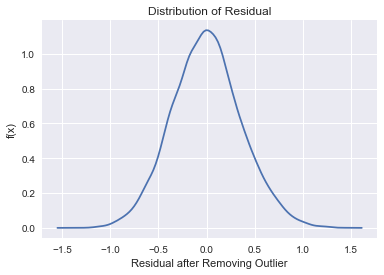

In [62]:
residual = result2.resid
sns.kdeplot(residual)
plt.xlabel('Residual after Removing Outlier')
plt.ylabel('f(x)')
plt.title('Distribution of Residual')
plt.show()

In [63]:
#import statsmodels.stats.api as sms

test = sms.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 44.970
P-value     :  0.000


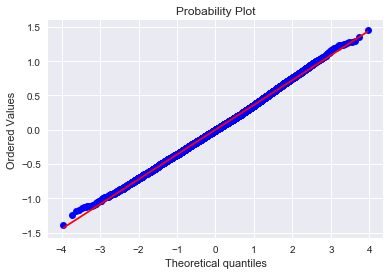

In [64]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

- 카이스퀘어 검정통계량을 살펴보면 스케일링을 하고 Outlier를 제거하였음에도 잔차에 대한 정규성 가정은 성립하지 않았다.

### 다중공선성 확인 및 제거

In [31]:
air_bnb1= air_bnb_scale[[u'accommodates', u'bedrooms','Seoul','Singapore', 'Switzerland', 'overall_satisfaction','reviews', 'Bathrooms',
                   'Beds','Extra_people', 'Entire_home_apt','Private_room','Shared_room', 'superhost', 'Internet','Somke_detector', 'Family_kid_friendly', 'Kitchen']]

def heatmap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,cmap="YlGnBu",annot=True)
    return ax

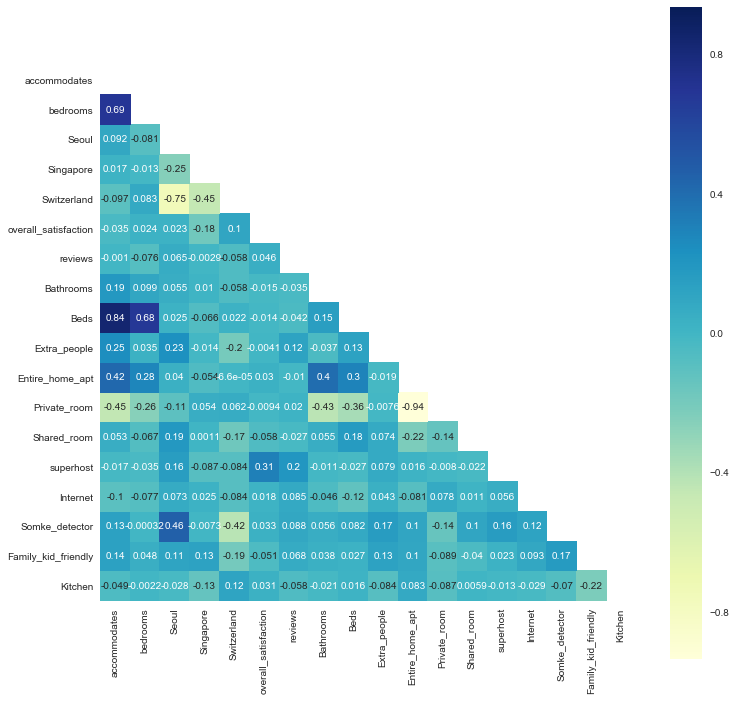

In [32]:
plt.figure(figsize=(12, 12))
heatmap(air_bnb1)

- 각 변수 간 상관관계를 Heatmap으로 나타내본 결과 최대숙박인원인 'accommodates'와 다른 변수들과의 상관관계가 높은 것으로 나타났다.
- 또한 'bedrooms'와 'Beds'간의 상관관계도 높다는 것을 확인할 수 있다.
- 따라서 이를 제거하여 over-fitting을 방지할 필요성이 발생하였다.

In [67]:
sm.stats.anova_lm(result2)

,df,sum_sq,mean_sq,F,PR(>F)
accommodates,1.0,1690.992404,1690.992404,12876.067798,0.000000e+00
bedrooms,1.0,529.393424,529.393424,4031.068150,0.000000e+00
overall_satisfaction,1.0,29.039409,29.039409,221.120687,1.011572e-49
reviews,1.0,18.901071,18.901071,143.922276,4.928126e-33
Bathrooms,1.0,186.245696,186.245696,1418.168530,6.934984e-299
Beds,1.0,78.152494,78.152494,595.092450,2.363832e-129
Seoul,1.0,1626.274620,1626.274620,12383.273998,0.000000e+00
Singapore,1.0,58.358821,58.358821,444.373451,1.784013e-97
Switzerland,1.0,0.001721,0.001721,0.013104,9.088658e-01
Entire_home_apt,1.0,794.539205,794.539205,6050.021662,0.000000e+00


- Heatmap으로 본 상관계수와 f-test 분석을 참고하여 독립변수의 수를 축소하여 보겠다.
- bedrooms, Beds, Switzerland, Private_room 축소

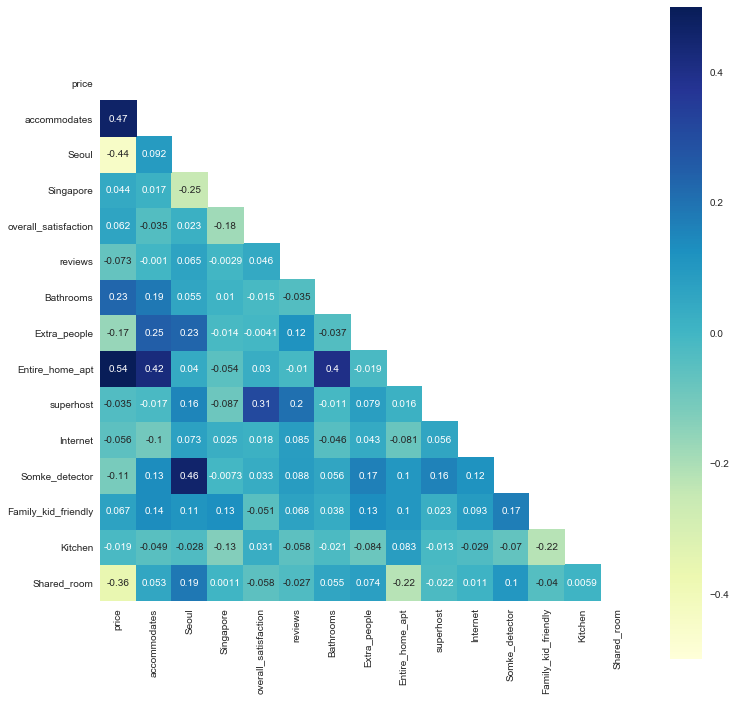

In [69]:
air_bnb2= air_bnb_scale[['price', u'accommodates', 'Seoul','Singapore','overall_satisfaction','reviews', 'Bathrooms',
                   'Extra_people', 'Entire_home_apt', 'superhost', 'Internet','Somke_detector', 'Family_kid_friendly', 'Kitchen', 'Shared_room']]

plt.figure(figsize=(12, 12))
heatmap(air_bnb2)

### 'Beds, bedrooms, Switzerland, Private_room'제거 후 회귀모형

In [29]:
model3m = sm.OLS.from_formula('price ~ accommodates+overall_satisfaction+reviews+Bathrooms+Seoul+Singapore+Entire_home_apt+Shared_room+Extra_people+superhost+Internet+Somke_detector+Family_kid_friendly+Kitchen', air_bnb_scale)
result3m = model3m.fit()
print(result3m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2739.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:44:30   Log-Likelihood:                -7791.9
No. Observations:               18148   AIC:                         1.561e+04
Df Residuals:                   18133   BIC:                         1.573e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.3982 

 - Beds, bedrooms,Switzerland,Private_room 4가지 변수를 제거하였을 때, R-Squared 0.02 가량 축소했지고 AIC검정량이 약간 증가했지만, 다중공선성을 줄일 수 있었다.

#### PCA

#### - 각 변수에 대해서 Eigenvalue를 계산한 다음 Explained variance가 $0.8$보다 큰 경우로 $m$을 결정

$$\frac{\sum_{i=1}^m \lambda_i}{\sum_{i=1}^p \lambda_i} > 0.8$$

여기서 $m$은 축소 차원의 수이다.

In [165]:
a = air_bnb_scale[["Beds", "bedrooms","accommodates"]]
b = air_bnb_scale[["Switzerland","Seoul","Singapore"]]
c = air_bnb_scale[["Private_room","Entire_home_apt"]]

In [168]:
tempPCA1 = sklearnPCA(n_components=2,svd_solver="auto")
newIndex_1 = tempPCA1.fit_transform(a)
tempPCA2 = sklearnPCA(n_components=2, svd_solver='auto')
newIndex_2 = tempPCA2.fit_transform(b)
tempPCA3 = sklearnPCA(n_components=1, svd_solver='auto')
newIndex_3 = tempPCA3.fit_transform(c)
air_bnb_scale['Facility1'] = newIndex_1[:,0]
air_bnb_scale['Facility2'] = newIndex_1[:,1]
air_bnb_scale['City1'] = newIndex_2[:,0]
air_bnb_scale['City2'] = newIndex_2[:,1]
air_bnb_scale['Room'] = newIndex_3[:,0]
air_bnb2= air_bnb_scale[[u'overall_satisfaction', u'reviews',u'Bathrooms',u'Shared_room',u'Extra_people', u'superhost',u'Internet', u'Somke_detector',
        u'Family_kid_friendly', u'Kitchen',u'Facility1',u'Facility2', u'City1',u'City2',u'Room',"price"]]

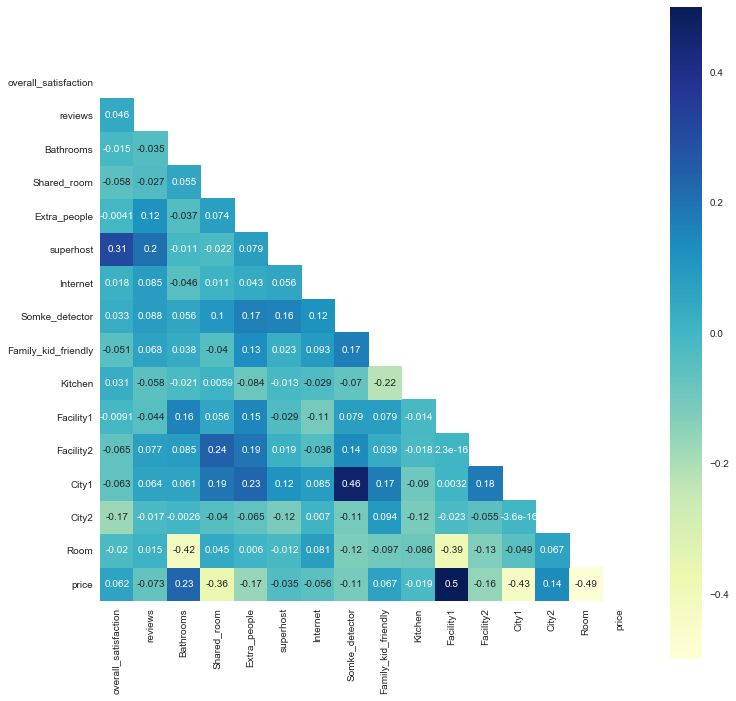

In [42]:
plt.figure(figsize=(12, 12))
heatmap(air_bnb2)

In [43]:
model4 = sm.OLS.from_formula('price ~ overall_satisfaction + reviews + Bathrooms + Shared_room + Extra_people + superhost + Internet + Somke_detector +Family_kid_friendly + Kitchen + City1 + City2 + Facility1 +Facility2 +Room', air_bnb2)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2617.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:58:38   Log-Likelihood:                -7647.7
No. Observations:               18148   AIC:                         1.533e+04
Df Residuals:                   18132   BIC:                         1.545e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.3880 

#### - Price와 상관관계가 적은 항목인 Family_kid_friendly, Internet, superhost, reviews를 제외하고 모델구성

In [45]:
model5 = sm.OLS.from_formula('price ~ overall_satisfaction + Bathrooms + Shared_room + Extra_people +  Somke_detector  + Kitchen + City1 + City2 + Facility1 +Facility2 +Room', air_bnb2)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     3493.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:00:42   Log-Likelihood:                -7781.3
No. Observations:               18148   AIC:                         1.559e+04
Df Residuals:                   18136   BIC:                         1.568e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.4834 

## 6. 모형 Test

In [46]:
y = pd.DataFrame(air_bnb2['price'])
x_sample = air_bnb2.drop(['price', 'Family_kid_friendly', 'Internet', 'superhost', 'reviews'],axis = 1)

cv = KFold(n_splits=5, shuffle=False)
test_idx = []
train_idx = []
for train_index, test_index in cv.split(x_sample):
    test_idx.append(test_index)
    train_idx.append(train_index)

In [47]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=0)

scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(cv.split(x_sample)):
    X_train = x_sample.loc[train_idx[i]]
    y_train = y.loc[train_idx[i]]
    X_test = x_sample.loc[test_idx[i]]
    y_test = y.loc[test_idx[i]]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = mean_squared_error(y_test, y_pred)

-scores

array([-0.14152065, -0.14320565, -0.13417643, -0.13662549, -0.13548289])

In [48]:
-scores.mean(), scores.var()

(-0.13820222187199852, 1.2426815101564939e-05)

### 최종모형의 Predicted Value와 Target Value의 Scatter plot

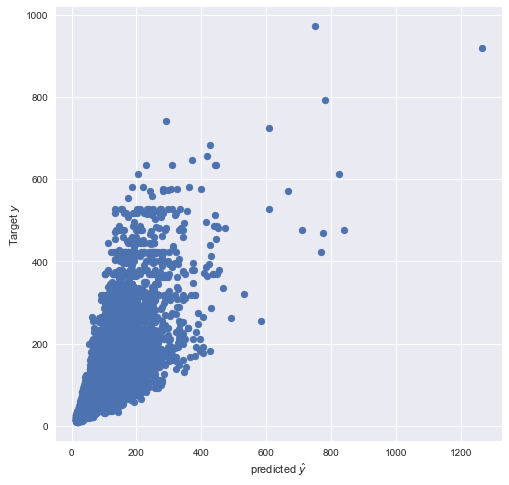

In [71]:
a = np.exp(result5.predict(air_bnb2.drop('price', axis = 1)))
b = np.exp(air_bnb2['price'])
plt.figure(figsize=(8, 8))
plt.title('')
plt.xlabel('predicted $\hat{y}$')
plt.ylabel('Target $y$')
plt.scatter(a ,b);
plt.show()

##  7. 결론

### 결과
모형을 통해서 추정하고자 했던 에어비앤비의 1박당 가격은 숙소의 전체 평점, 욕실 수, 쉐어드 룸 객실타입, 추가인원 당 추가요금, 화재감지기 여부, 주방 유무, Facility1, 2(침대 갯수, 침실 수, 최대수용인원), City1, 2(숙소가 위치한 도시), Room(숙소의 타입 - 개인실, 숙소전체)에 영향을 받는 것으로 분석되었다.
 분석 전 유효할 것이라 생각했던 슈퍼호스트 여부 및 리뷰 수는 최종 모형에서 제외되었다. 하지만 $R^2$ 값이 0.679로 여전히 가격을 잘 설명하고 있다고 생각되며 분석 초반 있었던 다중공선성 문제를 해결하여 안정적으로 모형을 사용할 수 있다고 생각된다. 

#### 최종모형
$$
\begin{split}
\hat{y} = &\exp{(4.484 + 0.028 x_{\text{overall_satisfaction}} + 0.042 x_{\text{Bathrooms}} - 1.039 x_{\text{Shared_room}} - 0.145 x_{\text{Extra_people}}+0.082 x_{\text{Smoke_detector}}}\\
&\times \exp{( - 0.089 x_{\text{Kitchen}} + 0.182 x_{\text{Facility1}} - 0.057 x_{\text{Facility2}} - 0.409 x_{\text{City1}} + 0.246 x_{\text{City2}} - 0.32 x_{\text{Room}})}
\end{split}
$$

In [83]:
mid = int(np.where(scores.argsort()==2)[0])
res = model.fit(x_sample.loc[train_idx[mid]], y.loc[train_idx[mid]])
#y_pred = model.predict(x_sample.loc[test_idx[mid]])
print('Coefficients')
print('')
print('Intercept: w0 = %.3f'%res.intercept_[0])
for i, item in enumerate(zip(np.array(x_sample.columns), (res.coef_[0]))):
    print('%s: w%s = %.3f'%(item[0], (i+1), item[1]))

Coefficients

Intercept: w0 = 4.484
overall_satisfaction: w1 = 0.028
Bathrooms: w2 = 0.042
Shared_room: w3 = -1.039
Extra_people: w4 = -0.145
Somke_detector: w5 = 0.082
Kitchen: w6 = -0.089
Facility1: w7 = 0.182
Facility2: w8 = -0.057
City1: w9 = -0.409
City2: w10 = 0.246
Room: w11 = -0.320



### 코멘트
분석을 하면서 가장 어려웠던 점은 선형회귀모형의 기본 가정인 잔차의 정규성을 충족시키는 문제였다. 여러가지 스케일링 방법을 사용해 시도하였으나 결국 잔차의 정규성은 충족시키지 못하였다. 또한 독립변수들 간 다중공선성 문제를 해결하는 것이였다. single coeficient F test와 상관계수 히트맵을 바탕으로 독립변수를 제거하는 방법과 PCA 방법을 통해 독립변수의 차원을 축소시키는 방법을 통해 다중공선성 문제를 해결하였다.
 분석 과정 중 이해하지 못했던 부분은 카테고리 변수가 one-hot-encoding을 통해 모델에 적용되면 cond no가 증가하여 다중공선성 문제가 발생하였다. 결국 분석 마지막까지 원인을 찾지는 못하였다.